In [36]:
import pandas as pd 
import numpy as np
from sklearn import feature_extraction
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from nltk.stem import WordNetLemmatizer
lemmer=WordNetLemmatizer()

def load_file(filename):

    X = []
    y = []

    with open(filename) as f:
        for i,line in enumerate(f):
            index = 0
            indices = []
            for char in line:
                if char == ',':
                    indices.append(index)
                    break
                index += 1
            value = line[0:index]
            tag = ''
            if float(value) > 0.4 and float(value) <= 0.6:
                continue
            
            if float(value) > 0.6:
                tag = 1
            elif float(value) <= 0.4:
                tag = 0
            
            text = line[index:]
            text = tokenizer.tokenize(text)
            text = [x.lower() for x in text]
            text = [lemmer.lemmatize(x) for x in text]
            text = " ".join(text)
            
            y.append(tag)
            X.append(text)
            
    return X,y

def load_file2(filename):

    X = []
    y = []

    with open(filename) as f:
        for i,line in enumerate(f):
            index = 0
            indices = []
            for char in line:
                if char == ',':
                    indices.append(index)
                    break
                index += 1
            value = line[0:index]
            tag = ''
            
            if float(value) > 0.8:
                tag = 4
            elif float(value) > 0.6:
                tag = 3
            elif float(value) > 0.4:
                tag = 2
            elif float(value) > 0.2:
                tag = 1
            else:
                tag = 0
            
            text = line[index:]
            text = tokenizer.tokenize(text)
            text = [x.lower() for x in text]
            text = [lemmer.lemmatize(x) for x in text]
            text = " ".join(text)
            
            y.append(tag)
            X.append(text)
            
    return X,y

In [6]:
X_train, y_train = load_file('sst_train_sentences.csv')
X_dev, y_dev = load_file('sst_dev.csv')
X_test, y_test = load_file('sst_test.csv')
y_final_train = np.array(y_train + y_dev)
X_final_train = np.array([row for row in X_train] + [row for row in X_dev])

In [7]:
X_train_2, y_train_2 = load_file2('sst_train_sentences.csv')
X_dev_2, y_dev_2 = load_file2('sst_dev.csv')
X_test_2, y_test_2 = load_file2('sst_test.csv')
y_final_train_2 = np.array(y_train_2 + y_dev_2)
X_final_train_2 = np.array([row for row in X_train_2] + [row for row in X_dev_2])

In [9]:
#vectorizer = feature_extraction.text.CountVectorizer(ngram_range = (1,1), binary = True)
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range = (1,1), binary = True, sublinear_tf = True)
vectorizer.fit(X_train + X_dev + X_test)
X_train = vectorizer.transform(X_train)
X_dev = vectorizer.transform(X_dev)
X_test = vectorizer.transform(X_test)
X_final_train = vectorizer.transform(X_final_train)

In [10]:
#vectorizer_2 = feature_extraction.text.CountVectorizer(ngram_range = (1,1), binary = True)
vectorizer_2 = feature_extraction.text.TfidfVectorizer(ngram_range = (1,1), binary = True, sublinear_tf = True)
vectorizer_2.fit(X_train_2 + X_dev_2 + X_test_2)
X_train_2 = vectorizer_2.transform(X_train_2)
X_dev_2 = vectorizer_2.transform(X_dev_2)
X_test_2 = vectorizer_2.transform(X_test_2)
X_final_train_2 = vectorizer_2.transform(X_final_train_2)

Score: 0.5091743119266054 Current_Best: 0.5091743119266054 Left: 2000
Score: 0.5091743119266054 Current_Best: 0.5091743119266054 Left: 1999
Score: 0.5160550458715596 Current_Best: 0.5160550458715596 Left: 1998
Score: 0.5344036697247706 Current_Best: 0.5344036697247706 Left: 1997
Score: 0.5653669724770642 Current_Best: 0.5653669724770642 Left: 1996
Score: 0.5951834862385321 Current_Best: 0.5951834862385321 Left: 1995
Score: 0.6123853211009175 Current_Best: 0.6123853211009175 Left: 1994
Score: 0.6341743119266054 Current_Best: 0.6341743119266054 Left: 1993
Score: 0.6444954128440367 Current_Best: 0.6444954128440367 Left: 1992
Score: 0.658256880733945 Current_Best: 0.658256880733945 Left: 1991
Score: 0.6708715596330275 Current_Best: 0.6708715596330275 Left: 1990
Score: 0.676605504587156 Current_Best: 0.676605504587156 Left: 1989
Score: 0.6846330275229358 Current_Best: 0.6846330275229358 Left: 1988
Score: 0.6880733944954128 Current_Best: 0.6880733944954128 Left: 1987
Score: 0.686926605504587

Score: 0.7821100917431193 Current_Best: 0.7821100917431193 Left: 1877
Score: 0.7821100917431193 Current_Best: 0.7821100917431193 Left: 1876
Score: 0.783256880733945 Current_Best: 0.783256880733945 Left: 1875
Score: 0.7855504587155964 Current_Best: 0.7855504587155964 Left: 1874
Score: 0.7844036697247706 Current_Best: 0.7855504587155964 Left: 1873
Score: 0.7855504587155964 Current_Best: 0.7855504587155964 Left: 1872
Score: 0.7855504587155964 Current_Best: 0.7855504587155964 Left: 1871
Score: 0.786697247706422 Current_Best: 0.786697247706422 Left: 1870
Score: 0.786697247706422 Current_Best: 0.786697247706422 Left: 1869
Score: 0.786697247706422 Current_Best: 0.786697247706422 Left: 1868
Score: 0.786697247706422 Current_Best: 0.786697247706422 Left: 1867
Score: 0.786697247706422 Current_Best: 0.786697247706422 Left: 1866
Score: 0.7878440366972477 Current_Best: 0.7878440366972477 Left: 1865
Score: 0.786697247706422 Current_Best: 0.7878440366972477 Left: 1864
Score: 0.786697247706422 Current_

Score: 0.7993119266055045 Current_Best: 0.7993119266055045 Left: 1759
Score: 0.7993119266055045 Current_Best: 0.7993119266055045 Left: 1758
Score: 0.7993119266055045 Current_Best: 0.7993119266055045 Left: 1757
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 1756
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 1755
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 1754
Score: 0.7993119266055045 Current_Best: 0.8004587155963303 Left: 1753
Score: 0.7993119266055045 Current_Best: 0.8004587155963303 Left: 1752
Score: 0.7993119266055045 Current_Best: 0.8004587155963303 Left: 1751
Score: 0.7993119266055045 Current_Best: 0.8004587155963303 Left: 1750
Score: 0.7993119266055045 Current_Best: 0.8004587155963303 Left: 1749
Score: 0.7993119266055045 Current_Best: 0.8004587155963303 Left: 1748
Score: 0.7981651376146789 Current_Best: 0.8004587155963303 Left: 1747
Score: 0.7970183486238532 Current_Best: 0.8004587155963303 Left: 1746
Score: 0.79701834862

Score: 0.7993119266055045 Current_Best: 0.801605504587156 Left: 1640
Score: 0.7993119266055045 Current_Best: 0.801605504587156 Left: 1639
Score: 0.7981651376146789 Current_Best: 0.801605504587156 Left: 1638
Score: 0.7981651376146789 Current_Best: 0.801605504587156 Left: 1637
Score: 0.7981651376146789 Current_Best: 0.801605504587156 Left: 1636
Score: 0.7981651376146789 Current_Best: 0.801605504587156 Left: 1635
Score: 0.7981651376146789 Current_Best: 0.801605504587156 Left: 1634
Score: 0.7981651376146789 Current_Best: 0.801605504587156 Left: 1633
Score: 0.7981651376146789 Current_Best: 0.801605504587156 Left: 1632
Score: 0.7981651376146789 Current_Best: 0.801605504587156 Left: 1631
Score: 0.7981651376146789 Current_Best: 0.801605504587156 Left: 1630
Score: 0.7981651376146789 Current_Best: 0.801605504587156 Left: 1629
Score: 0.7981651376146789 Current_Best: 0.801605504587156 Left: 1628
Score: 0.7981651376146789 Current_Best: 0.801605504587156 Left: 1627
Score: 0.7970183486238532 Current_

Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1517
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1516
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1515
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1514
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1513
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1512
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1511
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1510
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1509
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1508
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1507
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1506
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1505
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 1504
Score: 0.80275229357

Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1397
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1396
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1395
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1394
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1393
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1392
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1391
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1390
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1389
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1388
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1387
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1386
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1385
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1384
Score: 0.79587155963

Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1279
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1278
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 1277
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 1276
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 1275
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 1274
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 1273
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 1272
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 1271
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 1270
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 1269
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 1268
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 1267
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 1266
Score: 0.79472477064

Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1158
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1157
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1156
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1155
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1154
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1153
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1152
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1151
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1150
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1149
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1148
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1147
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1146
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1145
Score: 0.79357798165

Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1037
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1036
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1035
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1034
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1033
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1032
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1031
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1030
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1029
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1028
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1027
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1026
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1025
Score: 0.7924311926605505 Current_Best: 0.8027522935779816 Left: 1024
Score: 0.79243119266

Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 918
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 917
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 916
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 915
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 914
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 913
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 912
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 911
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 910
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 909
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 908
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 907
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 906
Score: 0.7912844036697247 Current_Best: 0.8027522935779816 Left: 905
Score: 0.7912844036697247 Current_

Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 798
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 797
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 796
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 795
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 794
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 793
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 792
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 791
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 790
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 789
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 788
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 787
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 786
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 785
Score: 0.7935779816513762 Current_

Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 677
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 676
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 675
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 674
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 673
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 672
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 671
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 670
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 669
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 668
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 667
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 666
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 665
Score: 0.7958715596330275 Current_Best: 0.8027522935779816 Left: 664
Score: 0.7958715596330275 Current_

Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 556
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 555
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 554
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 553
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 552
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 551
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 550
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 549
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 548
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 547
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 546
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 545
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 544
Score: 0.7970183486238532 Current_Best: 0.8027522935779816 Left: 543
Score: 0.7970183486238532 Current_

Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 434
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 433
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 432
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 431
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 430
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 429
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 428
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 427
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 426
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 425
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 424
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 423
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 422
Score: 0.7981651376146789 Current_Best: 0.8027522935779816 Left: 421
Score: 0.7981651376146789 Current_

Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 312
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 311
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 310
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 309
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 308
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 307
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 306
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 305
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 304
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 303
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 302
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 301
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 300
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 299
Score: 0.7947247706422018 Current_

Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 191
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 190
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 189
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 188
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 187
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 186
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 185
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 184
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 183
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 182
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 181
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 180
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 179
Score: 0.7935779816513762 Current_Best: 0.8027522935779816 Left: 178
Score: 0.7935779816513762 Current_

Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 70
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 69
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 68
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 67
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 66
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 65
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 64
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 63
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 62
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 61
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 60
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 59
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 58
Score: 0.7947247706422018 Current_Best: 0.8027522935779816 Left: 57
Score: 0.7947247706422018 Current_Best: 0.802752

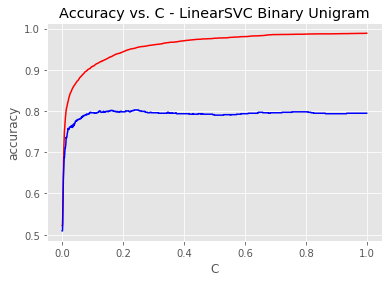

In [14]:
C_list = np.linspace(1e-5, 1, 2000)
num_iterations = len(C_list)
best_score = 0
best_C = 0
valid_scores = []
train_scores = []

for C in C_list:
    clf = svm.LinearSVC(random_state=0, tol=1e-5, C = C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_dev)
    score = metrics.accuracy_score(y_dev, y_pred)
    
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train, clf.predict(X_train)))
    
    if (best_score < score):
        best_score = score
        best_C = C
        
    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1
    
plt.plot(C_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(C_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('C')
plt.title('Accuracy vs. C - LinearSVC Binary Unigram (Coarse)')
plt.savefig('(Treebank)LinearSVC Binary Unigram Coarse')

In [15]:
clf = svm.LinearSVC(random_state=0, tol=1e-5, C = best_C)
clf.fit(X_final_train, y_final_train)
y_pred = clf.predict(X_test)

In [16]:
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.8204283360790774


Score: 0.25363636363636366 Current_Best: 0.25363636363636366 Left: 2000
Score: 0.2581818181818182 Current_Best: 0.2581818181818182 Left: 1999
Score: 0.28363636363636363 Current_Best: 0.28363636363636363 Left: 1998
Score: 0.30727272727272725 Current_Best: 0.30727272727272725 Left: 1997
Score: 0.32272727272727275 Current_Best: 0.32272727272727275 Left: 1996
Score: 0.33545454545454545 Current_Best: 0.33545454545454545 Left: 1995
Score: 0.3427272727272727 Current_Best: 0.3427272727272727 Left: 1994
Score: 0.3472727272727273 Current_Best: 0.3472727272727273 Left: 1993
Score: 0.3509090909090909 Current_Best: 0.3509090909090909 Left: 1992
Score: 0.3518181818181818 Current_Best: 0.3518181818181818 Left: 1991
Score: 0.3527272727272727 Current_Best: 0.3527272727272727 Left: 1990
Score: 0.3563636363636364 Current_Best: 0.3563636363636364 Left: 1989
Score: 0.3609090909090909 Current_Best: 0.3609090909090909 Left: 1988
Score: 0.36363636363636365 Current_Best: 0.36363636363636365 Left: 1987
Score: 0

Score: 0.39545454545454545 Current_Best: 0.39545454545454545 Left: 1881
Score: 0.39636363636363636 Current_Best: 0.39636363636363636 Left: 1880
Score: 0.39636363636363636 Current_Best: 0.39636363636363636 Left: 1879
Score: 0.3972727272727273 Current_Best: 0.3972727272727273 Left: 1878
Score: 0.3972727272727273 Current_Best: 0.3972727272727273 Left: 1877
Score: 0.3972727272727273 Current_Best: 0.3972727272727273 Left: 1876
Score: 0.3972727272727273 Current_Best: 0.3972727272727273 Left: 1875
Score: 0.3981818181818182 Current_Best: 0.3981818181818182 Left: 1874
Score: 0.3972727272727273 Current_Best: 0.3981818181818182 Left: 1873
Score: 0.3981818181818182 Current_Best: 0.3981818181818182 Left: 1872
Score: 0.3981818181818182 Current_Best: 0.3981818181818182 Left: 1871
Score: 0.3981818181818182 Current_Best: 0.3981818181818182 Left: 1870
Score: 0.3990909090909091 Current_Best: 0.3990909090909091 Left: 1869
Score: 0.3990909090909091 Current_Best: 0.3990909090909091 Left: 1868
Score: 0.39727

Score: 0.3881818181818182 Current_Best: 0.4 Left: 1732
Score: 0.3881818181818182 Current_Best: 0.4 Left: 1731
Score: 0.3881818181818182 Current_Best: 0.4 Left: 1730
Score: 0.3881818181818182 Current_Best: 0.4 Left: 1729
Score: 0.3881818181818182 Current_Best: 0.4 Left: 1728
Score: 0.3881818181818182 Current_Best: 0.4 Left: 1727
Score: 0.38727272727272727 Current_Best: 0.4 Left: 1726
Score: 0.38727272727272727 Current_Best: 0.4 Left: 1725
Score: 0.38727272727272727 Current_Best: 0.4 Left: 1724
Score: 0.38727272727272727 Current_Best: 0.4 Left: 1723
Score: 0.38727272727272727 Current_Best: 0.4 Left: 1722
Score: 0.3881818181818182 Current_Best: 0.4 Left: 1721
Score: 0.3881818181818182 Current_Best: 0.4 Left: 1720
Score: 0.3890909090909091 Current_Best: 0.4 Left: 1719
Score: 0.3890909090909091 Current_Best: 0.4 Left: 1718
Score: 0.3890909090909091 Current_Best: 0.4 Left: 1717
Score: 0.3890909090909091 Current_Best: 0.4 Left: 1716
Score: 0.3890909090909091 Current_Best: 0.4 Left: 1715
Score

Score: 0.3836363636363636 Current_Best: 0.4 Left: 1582
Score: 0.3836363636363636 Current_Best: 0.4 Left: 1581
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1580
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1579
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1578
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1577
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1576
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1575
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1574
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1573
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1572
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1571
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1570
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1569
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1568
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1567
Score: 0.38272727272727275 Current_Best: 0.4 Left: 1566
Score: 0.38272727272727275 Current_Best: 0.4 Left:

Score: 0.3809090909090909 Current_Best: 0.4 Left: 1433
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1432
Score: 0.38 Current_Best: 0.4 Left: 1431
Score: 0.38 Current_Best: 0.4 Left: 1430
Score: 0.38 Current_Best: 0.4 Left: 1429
Score: 0.38 Current_Best: 0.4 Left: 1428
Score: 0.38 Current_Best: 0.4 Left: 1427
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1426
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1425
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1424
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1423
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1422
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1421
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1420
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1419
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1418
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1417
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1416
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1415
Score: 0.3809090909090909

Score: 0.3790909090909091 Current_Best: 0.4 Left: 1277
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1276
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1275
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1274
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1273
Score: 0.3781818181818182 Current_Best: 0.4 Left: 1272
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1271
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1270
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1269
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1268
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1267
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1266
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1265
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1264
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1263
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1262
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1261
Score: 0.3790909090909091 Current_Best: 0.4 Left: 1260
Score: 0.3

Score: 0.3809090909090909 Current_Best: 0.4 Left: 1126
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1125
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1124
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1123
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1122
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1121
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1120
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1119
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1118
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1117
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1116
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1115
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1114
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1113
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1112
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1111
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1110
Score: 0.3809090909090909 Current_Best: 0.4 Left: 1109
Score: 0.3

Score: 0.3790909090909091 Current_Best: 0.4 Left: 960
Score: 0.3790909090909091 Current_Best: 0.4 Left: 959
Score: 0.3790909090909091 Current_Best: 0.4 Left: 958
Score: 0.3790909090909091 Current_Best: 0.4 Left: 957
Score: 0.3790909090909091 Current_Best: 0.4 Left: 956
Score: 0.3790909090909091 Current_Best: 0.4 Left: 955
Score: 0.37727272727272726 Current_Best: 0.4 Left: 954
Score: 0.37636363636363634 Current_Best: 0.4 Left: 953
Score: 0.37636363636363634 Current_Best: 0.4 Left: 952
Score: 0.37636363636363634 Current_Best: 0.4 Left: 951
Score: 0.37636363636363634 Current_Best: 0.4 Left: 950
Score: 0.37636363636363634 Current_Best: 0.4 Left: 949
Score: 0.37636363636363634 Current_Best: 0.4 Left: 948
Score: 0.37636363636363634 Current_Best: 0.4 Left: 947
Score: 0.37636363636363634 Current_Best: 0.4 Left: 946
Score: 0.37545454545454543 Current_Best: 0.4 Left: 945
Score: 0.37545454545454543 Current_Best: 0.4 Left: 944
Score: 0.37545454545454543 Current_Best: 0.4 Left: 943
Score: 0.3754545

Score: 0.37272727272727274 Current_Best: 0.4 Left: 810
Score: 0.37272727272727274 Current_Best: 0.4 Left: 809
Score: 0.37272727272727274 Current_Best: 0.4 Left: 808
Score: 0.37272727272727274 Current_Best: 0.4 Left: 807
Score: 0.37272727272727274 Current_Best: 0.4 Left: 806
Score: 0.37272727272727274 Current_Best: 0.4 Left: 805
Score: 0.37272727272727274 Current_Best: 0.4 Left: 804
Score: 0.37272727272727274 Current_Best: 0.4 Left: 803
Score: 0.37272727272727274 Current_Best: 0.4 Left: 802
Score: 0.37272727272727274 Current_Best: 0.4 Left: 801
Score: 0.37272727272727274 Current_Best: 0.4 Left: 800
Score: 0.37272727272727274 Current_Best: 0.4 Left: 799
Score: 0.37272727272727274 Current_Best: 0.4 Left: 798
Score: 0.37272727272727274 Current_Best: 0.4 Left: 797
Score: 0.37272727272727274 Current_Best: 0.4 Left: 796
Score: 0.37272727272727274 Current_Best: 0.4 Left: 795
Score: 0.37272727272727274 Current_Best: 0.4 Left: 794
Score: 0.37272727272727274 Current_Best: 0.4 Left: 793
Score: 0.3

Score: 0.36727272727272725 Current_Best: 0.4 Left: 649
Score: 0.36727272727272725 Current_Best: 0.4 Left: 648
Score: 0.36727272727272725 Current_Best: 0.4 Left: 647
Score: 0.36727272727272725 Current_Best: 0.4 Left: 646
Score: 0.36727272727272725 Current_Best: 0.4 Left: 645
Score: 0.36727272727272725 Current_Best: 0.4 Left: 644
Score: 0.36727272727272725 Current_Best: 0.4 Left: 643
Score: 0.36727272727272725 Current_Best: 0.4 Left: 642
Score: 0.36727272727272725 Current_Best: 0.4 Left: 641
Score: 0.36818181818181817 Current_Best: 0.4 Left: 640
Score: 0.3690909090909091 Current_Best: 0.4 Left: 639
Score: 0.3690909090909091 Current_Best: 0.4 Left: 638
Score: 0.3690909090909091 Current_Best: 0.4 Left: 637
Score: 0.3690909090909091 Current_Best: 0.4 Left: 636
Score: 0.3690909090909091 Current_Best: 0.4 Left: 635
Score: 0.3690909090909091 Current_Best: 0.4 Left: 634
Score: 0.3690909090909091 Current_Best: 0.4 Left: 633
Score: 0.3690909090909091 Current_Best: 0.4 Left: 632
Score: 0.369090909

Score: 0.36818181818181817 Current_Best: 0.4 Left: 496
Score: 0.36818181818181817 Current_Best: 0.4 Left: 495
Score: 0.36818181818181817 Current_Best: 0.4 Left: 494
Score: 0.36818181818181817 Current_Best: 0.4 Left: 493
Score: 0.36818181818181817 Current_Best: 0.4 Left: 492
Score: 0.36818181818181817 Current_Best: 0.4 Left: 491
Score: 0.36818181818181817 Current_Best: 0.4 Left: 490
Score: 0.36818181818181817 Current_Best: 0.4 Left: 489
Score: 0.36818181818181817 Current_Best: 0.4 Left: 488
Score: 0.36818181818181817 Current_Best: 0.4 Left: 487
Score: 0.36818181818181817 Current_Best: 0.4 Left: 486
Score: 0.36818181818181817 Current_Best: 0.4 Left: 485
Score: 0.36818181818181817 Current_Best: 0.4 Left: 484
Score: 0.36727272727272725 Current_Best: 0.4 Left: 483
Score: 0.36727272727272725 Current_Best: 0.4 Left: 482
Score: 0.36727272727272725 Current_Best: 0.4 Left: 481
Score: 0.36727272727272725 Current_Best: 0.4 Left: 480
Score: 0.36727272727272725 Current_Best: 0.4 Left: 479
Score: 0.3

Score: 0.3663636363636364 Current_Best: 0.4 Left: 345
Score: 0.3663636363636364 Current_Best: 0.4 Left: 344
Score: 0.3663636363636364 Current_Best: 0.4 Left: 343
Score: 0.3663636363636364 Current_Best: 0.4 Left: 342
Score: 0.3663636363636364 Current_Best: 0.4 Left: 341
Score: 0.3663636363636364 Current_Best: 0.4 Left: 340
Score: 0.3663636363636364 Current_Best: 0.4 Left: 339
Score: 0.3663636363636364 Current_Best: 0.4 Left: 338
Score: 0.3663636363636364 Current_Best: 0.4 Left: 337
Score: 0.3663636363636364 Current_Best: 0.4 Left: 336
Score: 0.3663636363636364 Current_Best: 0.4 Left: 335
Score: 0.3663636363636364 Current_Best: 0.4 Left: 334
Score: 0.3663636363636364 Current_Best: 0.4 Left: 333
Score: 0.3663636363636364 Current_Best: 0.4 Left: 332
Score: 0.3663636363636364 Current_Best: 0.4 Left: 331
Score: 0.3663636363636364 Current_Best: 0.4 Left: 330
Score: 0.3663636363636364 Current_Best: 0.4 Left: 329
Score: 0.3663636363636364 Current_Best: 0.4 Left: 328
Score: 0.3663636363636364 Cu

Score: 0.36363636363636365 Current_Best: 0.4 Left: 195
Score: 0.36363636363636365 Current_Best: 0.4 Left: 194
Score: 0.36363636363636365 Current_Best: 0.4 Left: 193
Score: 0.36363636363636365 Current_Best: 0.4 Left: 192
Score: 0.36272727272727273 Current_Best: 0.4 Left: 191
Score: 0.36272727272727273 Current_Best: 0.4 Left: 190
Score: 0.36272727272727273 Current_Best: 0.4 Left: 189
Score: 0.36272727272727273 Current_Best: 0.4 Left: 188
Score: 0.36272727272727273 Current_Best: 0.4 Left: 187
Score: 0.36272727272727273 Current_Best: 0.4 Left: 186
Score: 0.36272727272727273 Current_Best: 0.4 Left: 185
Score: 0.36272727272727273 Current_Best: 0.4 Left: 184
Score: 0.36272727272727273 Current_Best: 0.4 Left: 183
Score: 0.36272727272727273 Current_Best: 0.4 Left: 182
Score: 0.36272727272727273 Current_Best: 0.4 Left: 181
Score: 0.36272727272727273 Current_Best: 0.4 Left: 180
Score: 0.36272727272727273 Current_Best: 0.4 Left: 179
Score: 0.36272727272727273 Current_Best: 0.4 Left: 178
Score: 0.3

Score: 0.36454545454545456 Current_Best: 0.4 Left: 45
Score: 0.36454545454545456 Current_Best: 0.4 Left: 44
Score: 0.36454545454545456 Current_Best: 0.4 Left: 43
Score: 0.36454545454545456 Current_Best: 0.4 Left: 42
Score: 0.36454545454545456 Current_Best: 0.4 Left: 41
Score: 0.36454545454545456 Current_Best: 0.4 Left: 40
Score: 0.36454545454545456 Current_Best: 0.4 Left: 39
Score: 0.36454545454545456 Current_Best: 0.4 Left: 38
Score: 0.36454545454545456 Current_Best: 0.4 Left: 37
Score: 0.36454545454545456 Current_Best: 0.4 Left: 36
Score: 0.36454545454545456 Current_Best: 0.4 Left: 35
Score: 0.36454545454545456 Current_Best: 0.4 Left: 34
Score: 0.36454545454545456 Current_Best: 0.4 Left: 33
Score: 0.36454545454545456 Current_Best: 0.4 Left: 32
Score: 0.36454545454545456 Current_Best: 0.4 Left: 31
Score: 0.36454545454545456 Current_Best: 0.4 Left: 30
Score: 0.36454545454545456 Current_Best: 0.4 Left: 29
Score: 0.36454545454545456 Current_Best: 0.4 Left: 28
Score: 0.36454545454545456 C

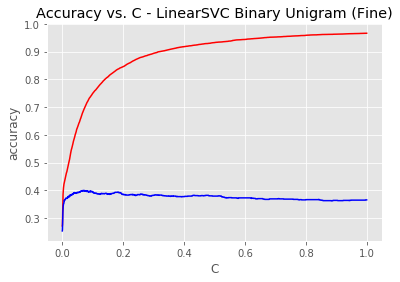

In [19]:
C_list = np.linspace(1e-5, 1, 2000)
num_iterations = len(C_list)
best_score = 0
best_C = 0
valid_scores = []
train_scores = []

for C in C_list:
    clf = svm.LinearSVC(random_state=0, tol=1e-5, C = C)
    clf.fit(X_train_2, y_train_2)
    y_pred = clf.predict(X_dev_2)
    score = metrics.accuracy_score(y_dev_2, y_pred)
    
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train_2, clf.predict(X_train_2)))
    
    if (best_score < score):
        best_score = score
        best_C = C
        
    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1
    
plt.plot(C_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(C_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('C')
plt.title('Accuracy vs. C - LinearSVC Binary Unigram (Fine)')
plt.savefig('(Treebank)LinearSVC Binary Unigram Fine')

clf = svm.LinearSVC(random_state=0, tol=1e-5, C = best_C)
clf.fit(X_final_train_2, y_final_train_2)
y_pred = clf.predict(X_test_2)

score = metrics.accuracy_score(y_test_2, y_pred)
print(score)

In [20]:
#Here
X_train, y_train = load_file('sst_train_sentences.csv')
X_dev, y_dev = load_file('sst_dev.csv')
X_test, y_test = load_file('sst_test.csv')
y_final_train = np.array(y_train + y_dev)
X_final_train = np.array([row for row in X_train] + [row for row in X_dev])

X_train_2, y_train_2 = load_file2('sst_train_sentences.csv')
X_dev_2, y_dev_2 = load_file2('sst_dev.csv')
X_test_2, y_test_2 = load_file2('sst_test.csv')
y_final_train_2 = np.array(y_train_2 + y_dev_2)
X_final_train_2 = np.array([row for row in X_train_2] + [row for row in X_dev_2])

vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range = (1,2), binary = True, sublinear_tf = True)
#vectorizer = feature_extraction.text.CountVectorizer(ngram_range = (1,2), binary = True)
vectorizer.fit(X_train + X_dev + X_test)
X_train = vectorizer.transform(X_train)
X_dev = vectorizer.transform(X_dev)
X_test = vectorizer.transform(X_test)
X_final_train = vectorizer.transform(X_final_train)

vectorizer_2 = feature_extraction.text.TfidfVectorizer(ngram_range = (1,2), binary = True, sublinear_tf = True)
#vectorizer_2 = feature_extraction.text.CountVectorizer(ngram_range = (1,2), binary = True)
vectorizer_2.fit(X_train_2 + X_dev_2 + X_test_2)
X_train_2 = vectorizer_2.transform(X_train_2)
X_dev_2 = vectorizer_2.transform(X_dev_2)
X_test_2 = vectorizer_2.transform(X_test_2)
X_final_train_2 = vectorizer_2.transform(X_final_train_2)

Score: 0.5091743119266054 Current_Best: 0.5091743119266054 Left: 2000
Score: 0.5091743119266054 Current_Best: 0.5091743119266054 Left: 1999
Score: 0.5091743119266054 Current_Best: 0.5091743119266054 Left: 1998
Score: 0.5103211009174312 Current_Best: 0.5103211009174312 Left: 1997
Score: 0.5114678899082569 Current_Best: 0.5114678899082569 Left: 1996
Score: 0.5149082568807339 Current_Best: 0.5149082568807339 Left: 1995
Score: 0.518348623853211 Current_Best: 0.518348623853211 Left: 1994
Score: 0.5252293577981652 Current_Best: 0.5252293577981652 Left: 1993
Score: 0.5321100917431193 Current_Best: 0.5321100917431193 Left: 1992
Score: 0.5447247706422018 Current_Best: 0.5447247706422018 Left: 1991
Score: 0.5607798165137615 Current_Best: 0.5607798165137615 Left: 1990
Score: 0.5688073394495413 Current_Best: 0.5688073394495413 Left: 1989
Score: 0.5802752293577982 Current_Best: 0.5802752293577982 Left: 1988
Score: 0.5928899082568807 Current_Best: 0.5928899082568807 Left: 1987
Score: 0.6032110091743

Score: 0.7798165137614679 Current_Best: 0.7798165137614679 Left: 1882
Score: 0.7809633027522935 Current_Best: 0.7809633027522935 Left: 1881
Score: 0.7809633027522935 Current_Best: 0.7809633027522935 Left: 1880
Score: 0.7809633027522935 Current_Best: 0.7809633027522935 Left: 1879
Score: 0.7809633027522935 Current_Best: 0.7809633027522935 Left: 1878
Score: 0.7809633027522935 Current_Best: 0.7809633027522935 Left: 1877
Score: 0.7809633027522935 Current_Best: 0.7809633027522935 Left: 1876
Score: 0.7809633027522935 Current_Best: 0.7809633027522935 Left: 1875
Score: 0.7798165137614679 Current_Best: 0.7809633027522935 Left: 1874
Score: 0.7798165137614679 Current_Best: 0.7809633027522935 Left: 1873
Score: 0.7798165137614679 Current_Best: 0.7809633027522935 Left: 1872
Score: 0.7798165137614679 Current_Best: 0.7809633027522935 Left: 1871
Score: 0.7798165137614679 Current_Best: 0.7809633027522935 Left: 1870
Score: 0.7798165137614679 Current_Best: 0.7809633027522935 Left: 1869
Score: 0.78096330275

Score: 0.7970183486238532 Current_Best: 0.7981651376146789 Left: 1764
Score: 0.7970183486238532 Current_Best: 0.7981651376146789 Left: 1763
Score: 0.7958715596330275 Current_Best: 0.7981651376146789 Left: 1762
Score: 0.7958715596330275 Current_Best: 0.7981651376146789 Left: 1761
Score: 0.7958715596330275 Current_Best: 0.7981651376146789 Left: 1760
Score: 0.7958715596330275 Current_Best: 0.7981651376146789 Left: 1759
Score: 0.7958715596330275 Current_Best: 0.7981651376146789 Left: 1758
Score: 0.7958715596330275 Current_Best: 0.7981651376146789 Left: 1757
Score: 0.7958715596330275 Current_Best: 0.7981651376146789 Left: 1756
Score: 0.7958715596330275 Current_Best: 0.7981651376146789 Left: 1755
Score: 0.7970183486238532 Current_Best: 0.7981651376146789 Left: 1754
Score: 0.7970183486238532 Current_Best: 0.7981651376146789 Left: 1753
Score: 0.7970183486238532 Current_Best: 0.7981651376146789 Left: 1752
Score: 0.7970183486238532 Current_Best: 0.7981651376146789 Left: 1751
Score: 0.79701834862

Score: 0.8061926605504587 Current_Best: 0.8061926605504587 Left: 1640
Score: 0.8061926605504587 Current_Best: 0.8061926605504587 Left: 1639
Score: 0.8061926605504587 Current_Best: 0.8061926605504587 Left: 1638
Score: 0.8061926605504587 Current_Best: 0.8061926605504587 Left: 1637
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1636
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1635
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1634
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1633
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1632
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1631
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1630
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1629
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1628
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1627
Score: 0.805045871559633 Curre

Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1521
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1520
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1519
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1518
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1517
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1516
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1515
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1514
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1513
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1512
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1511
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1510
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1509
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 1508
Score: 0.805045871559633 Current_B

Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1403
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1402
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1401
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1400
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1399
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1398
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1397
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1396
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1395
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1394
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1393
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1392
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1391
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1390
Score: 0.80275229357

Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 1283
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 1282
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 1281
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 1280
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 1279
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 1278
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 1277
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 1276
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 1275
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 1274
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 1273
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 1272
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 1271
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 1270
Score: 0.80045871559

Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 1165
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 1164
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 1163
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 1162
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 1161
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 1160
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 1159
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 1158
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 1157
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 1156
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 1155
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 1154
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 1153
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 1152
Score: 0.801605504587156 C

Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1044
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1043
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1042
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1041
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1040
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1039
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1038
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1037
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1036
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1035
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1034
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1033
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1032
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 1031
Score: 0.80275229357

Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 925
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 924
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 923
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 922
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 921
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 920
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 919
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 918
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 917
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 916
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 915
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 914
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 913
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 912
Score: 0.8038990825688074 Current_

Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 805
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 804
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 803
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 802
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 801
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 800
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 799
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 798
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 797
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 796
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 795
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 794
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 793
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 792
Score: 0.8038990825688074 Current_

Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 684
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 683
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 682
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 681
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 680
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 679
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 678
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 677
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 676
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 675
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 674
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 673
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 672
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 671
Score: 0.805045871559633 Current_Best: 0.8061926

Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 564
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 563
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 562
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 561
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 560
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 559
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 558
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 557
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 556
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 555
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 554
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 553
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 552
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 551
Score: 0.8038990825688074 Current_

Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 443
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 442
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 441
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 440
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 439
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 438
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 437
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 436
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 435
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 434
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 433
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 432
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 431
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 430
Score: 0.8038990825688074 Current_

Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 321
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 320
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 319
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 318
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 317
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 316
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 315
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 314
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 313
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 312
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 311
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 310
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 309
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 308
Score: 0.8038990825688074 Current_

Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 199
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 198
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 197
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 196
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 195
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 194
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 193
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 192
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 191
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 190
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 189
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 188
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 187
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 186
Score: 0.8038990825688074 Current_

Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 79
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 78
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 77
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 76
Score: 0.805045871559633 Current_Best: 0.8061926605504587 Left: 75
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 74
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 73
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 72
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 71
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 70
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 69
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 68
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 67
Score: 0.8038990825688074 Current_Best: 0.8061926605504587 Left: 66
Score: 0.8038990825688074 Current_Best: 0.80619266055

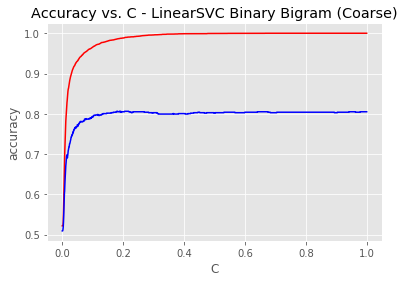

In [22]:
C_list = np.linspace(1e-5, 1, 2000)
num_iterations = len(C_list)
best_score = 0
best_C = 0
valid_scores = []
train_scores = []

for C in C_list:
    clf = svm.LinearSVC(random_state=0, tol=1e-5, C = C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_dev)
    score = metrics.accuracy_score(y_dev, y_pred)
    
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train, clf.predict(X_train)))
    
    if (best_score < score):
        best_score = score
        best_C = C
        
    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1
    
plt.plot(C_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(C_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('C')
plt.title('Accuracy vs. C - LinearSVC Binary Bigram (Coarse)')
plt.savefig('(Treebank)LinearSVC Binary Bigram Coarse')

clf = svm.LinearSVC(random_state=0, tol=1e-5, C = best_C)
clf.fit(X_final_train, y_final_train)
y_pred = clf.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)
print(score)

Score: 0.25363636363636366 Current_Best: 0.25363636363636366 Left: 1000
Score: 0.25727272727272726 Current_Best: 0.25727272727272726 Left: 999
Score: 0.27454545454545454 Current_Best: 0.27454545454545454 Left: 998
Score: 0.29363636363636364 Current_Best: 0.29363636363636364 Left: 997
Score: 0.3054545454545455 Current_Best: 0.3054545454545455 Left: 996
Score: 0.3245454545454545 Current_Best: 0.3245454545454545 Left: 995
Score: 0.3336363636363636 Current_Best: 0.3336363636363636 Left: 994
Score: 0.34 Current_Best: 0.34 Left: 993
Score: 0.34363636363636363 Current_Best: 0.34363636363636363 Left: 992
Score: 0.34454545454545454 Current_Best: 0.34454545454545454 Left: 991
Score: 0.34545454545454546 Current_Best: 0.34545454545454546 Left: 990
Score: 0.3518181818181818 Current_Best: 0.3518181818181818 Left: 989
Score: 0.35363636363636364 Current_Best: 0.35363636363636364 Left: 988
Score: 0.35818181818181816 Current_Best: 0.35818181818181816 Left: 987
Score: 0.3618181818181818 Current_Best: 0.3

Score: 0.3927272727272727 Current_Best: 0.39636363636363636 Left: 881
Score: 0.39181818181818184 Current_Best: 0.39636363636363636 Left: 880
Score: 0.3927272727272727 Current_Best: 0.39636363636363636 Left: 879
Score: 0.3927272727272727 Current_Best: 0.39636363636363636 Left: 878
Score: 0.39090909090909093 Current_Best: 0.39636363636363636 Left: 877
Score: 0.3927272727272727 Current_Best: 0.39636363636363636 Left: 876
Score: 0.3927272727272727 Current_Best: 0.39636363636363636 Left: 875
Score: 0.39454545454545453 Current_Best: 0.39636363636363636 Left: 874
Score: 0.3936363636363636 Current_Best: 0.39636363636363636 Left: 873
Score: 0.39545454545454545 Current_Best: 0.39636363636363636 Left: 872
Score: 0.39545454545454545 Current_Best: 0.39636363636363636 Left: 871
Score: 0.39454545454545453 Current_Best: 0.39636363636363636 Left: 870
Score: 0.39454545454545453 Current_Best: 0.39636363636363636 Left: 869
Score: 0.3936363636363636 Current_Best: 0.39636363636363636 Left: 868
Score: 0.3927

Score: 0.4 Current_Best: 0.4027272727272727 Left: 759
Score: 0.4 Current_Best: 0.4027272727272727 Left: 758
Score: 0.4 Current_Best: 0.4027272727272727 Left: 757
Score: 0.4 Current_Best: 0.4027272727272727 Left: 756
Score: 0.4 Current_Best: 0.4027272727272727 Left: 755
Score: 0.4 Current_Best: 0.4027272727272727 Left: 754
Score: 0.4 Current_Best: 0.4027272727272727 Left: 753
Score: 0.4 Current_Best: 0.4027272727272727 Left: 752
Score: 0.4 Current_Best: 0.4027272727272727 Left: 751
Score: 0.3990909090909091 Current_Best: 0.4027272727272727 Left: 750
Score: 0.3990909090909091 Current_Best: 0.4027272727272727 Left: 749
Score: 0.3990909090909091 Current_Best: 0.4027272727272727 Left: 748
Score: 0.3972727272727273 Current_Best: 0.4027272727272727 Left: 747
Score: 0.3972727272727273 Current_Best: 0.4027272727272727 Left: 746
Score: 0.3972727272727273 Current_Best: 0.4027272727272727 Left: 745
Score: 0.3972727272727273 Current_Best: 0.4027272727272727 Left: 744
Score: 0.3972727272727273 Curre

Score: 0.3990909090909091 Current_Best: 0.4027272727272727 Left: 632
Score: 0.3990909090909091 Current_Best: 0.4027272727272727 Left: 631
Score: 0.3990909090909091 Current_Best: 0.4027272727272727 Left: 630
Score: 0.3990909090909091 Current_Best: 0.4027272727272727 Left: 629
Score: 0.3981818181818182 Current_Best: 0.4027272727272727 Left: 628
Score: 0.3981818181818182 Current_Best: 0.4027272727272727 Left: 627
Score: 0.3981818181818182 Current_Best: 0.4027272727272727 Left: 626
Score: 0.3981818181818182 Current_Best: 0.4027272727272727 Left: 625
Score: 0.3981818181818182 Current_Best: 0.4027272727272727 Left: 624
Score: 0.3981818181818182 Current_Best: 0.4027272727272727 Left: 623
Score: 0.3981818181818182 Current_Best: 0.4027272727272727 Left: 622
Score: 0.3981818181818182 Current_Best: 0.4027272727272727 Left: 621
Score: 0.3981818181818182 Current_Best: 0.4027272727272727 Left: 620
Score: 0.3981818181818182 Current_Best: 0.4027272727272727 Left: 619
Score: 0.3981818181818182 Current_

Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 512
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 511
Score: 0.39454545454545453 Current_Best: 0.4027272727272727 Left: 510
Score: 0.39454545454545453 Current_Best: 0.4027272727272727 Left: 509
Score: 0.39545454545454545 Current_Best: 0.4027272727272727 Left: 508
Score: 0.39545454545454545 Current_Best: 0.4027272727272727 Left: 507
Score: 0.39545454545454545 Current_Best: 0.4027272727272727 Left: 506
Score: 0.39545454545454545 Current_Best: 0.4027272727272727 Left: 505
Score: 0.39545454545454545 Current_Best: 0.4027272727272727 Left: 504
Score: 0.39545454545454545 Current_Best: 0.4027272727272727 Left: 503
Score: 0.39545454545454545 Current_Best: 0.4027272727272727 Left: 502
Score: 0.39545454545454545 Current_Best: 0.4027272727272727 Left: 501
Score: 0.39545454545454545 Current_Best: 0.4027272727272727 Left: 500
Score: 0.39545454545454545 Current_Best: 0.4027272727272727 Left: 499
Score: 0.3954545454545

Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 394
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 393
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 392
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 391
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 390
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 389
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 388
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 387
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 386
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 385
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 384
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 383
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 382
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 381
Score: 0.3936363636363636 Current_

Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 275
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 274
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 273
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 272
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 271
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 270
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 269
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 268
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 267
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 266
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 265
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 264
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 263
Score: 0.3936363636363636 Current_Best: 0.4027272727272727 Left: 262
Score: 0.3936363636363636 Current_

Score: 0.39181818181818184 Current_Best: 0.4027272727272727 Left: 156
Score: 0.39090909090909093 Current_Best: 0.4027272727272727 Left: 155
Score: 0.39090909090909093 Current_Best: 0.4027272727272727 Left: 154
Score: 0.39090909090909093 Current_Best: 0.4027272727272727 Left: 153
Score: 0.39 Current_Best: 0.4027272727272727 Left: 152
Score: 0.39 Current_Best: 0.4027272727272727 Left: 151
Score: 0.39 Current_Best: 0.4027272727272727 Left: 150
Score: 0.39 Current_Best: 0.4027272727272727 Left: 149
Score: 0.39 Current_Best: 0.4027272727272727 Left: 148
Score: 0.39 Current_Best: 0.4027272727272727 Left: 147
Score: 0.39 Current_Best: 0.4027272727272727 Left: 146
Score: 0.39 Current_Best: 0.4027272727272727 Left: 145
Score: 0.3890909090909091 Current_Best: 0.4027272727272727 Left: 144
Score: 0.3890909090909091 Current_Best: 0.4027272727272727 Left: 143
Score: 0.3890909090909091 Current_Best: 0.4027272727272727 Left: 142
Score: 0.3890909090909091 Current_Best: 0.4027272727272727 Left: 141
Scor

Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 35
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 34
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 33
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 32
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 31
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 30
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 29
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 28
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 27
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 26
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 25
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 24
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 23
Score: 0.3881818181818182 Current_Best: 0.4027272727272727 Left: 22
Score: 0.3890909090909091 Current_Best: 0.402727

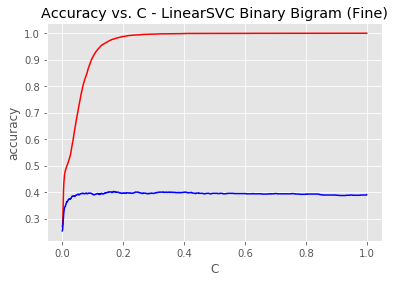

In [24]:
C_list = np.linspace(1e-5, 1, 1000)
num_iterations = len(C_list)
best_score = 0
best_C = 0
valid_scores = []
train_scores = []

for C in C_list:
    clf = svm.LinearSVC(random_state=0, tol=1e-5, C = C)
    clf.fit(X_train_2, y_train_2)
    y_pred = clf.predict(X_dev_2)
    score = metrics.accuracy_score(y_dev_2, y_pred)
    
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train_2, clf.predict(X_train_2)))
    
    if (best_score < score):
        best_score = score
        best_C = C
        
    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1
  
plt.plot(C_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(C_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('C')
plt.title('Accuracy vs. C - LinearSVC Binary Bigram (Fine)')
plt.savefig('(Treebank)LinearSVC Binary Bigram Fine')

clf = svm.LinearSVC(random_state=0, tol=1e-5, C = best_C)
clf.fit(X_final_train_2, y_final_train_2)
y_pred = clf.predict(X_test_2)

score = metrics.accuracy_score(y_test_2, y_pred)
print(score)

In [25]:
X_train, y_train = load_file('sst_train_sentences.csv')
X_dev, y_dev = load_file('sst_dev.csv')
X_test, y_test = load_file('sst_test.csv')
y_final_train = np.array(y_train + y_dev)
X_final_train = np.array([row for row in X_train] + [row for row in X_dev])

X_train_2, y_train_2 = load_file2('sst_train_sentences.csv')
X_dev_2, y_dev_2 = load_file2('sst_dev.csv')
X_test_2, y_test_2 = load_file2('sst_test.csv')
y_final_train_2 = np.array(y_train_2 + y_dev_2)
X_final_train_2 = np.array([row for row in X_train_2] + [row for row in X_dev_2])

In [35]:
#vectorizer = feature_extraction.text.CountVectorizer(ngram_range = (1,1), binary = False)
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range = (1,1), binary = False, sublinear_tf = True)
vectorizer.fit(X_train + X_dev + X_test)
X_train = vectorizer.transform(X_train)
X_dev = vectorizer.transform(X_dev)
X_test = vectorizer.transform(X_test)
X_final_train = vectorizer.transform(X_final_train)

#vectorizer_2 = feature_extraction.text.CountVectorizer(ngram_range = (1,1), binary = False)
vectorizer_2 = feature_extraction.text.TfidfVectorizer(ngram_range = (1,1), binary = False, sublinear_tf = True)
vectorizer_2.fit(X_train_2 + X_dev_2 + X_test_2)
X_train_2 = vectorizer_2.transform(X_train_2)
X_dev_2 = vectorizer_2.transform(X_dev_2)
X_test_2 = vectorizer_2.transform(X_test_2)
X_final_train_2 = vectorizer_2.transform(X_final_train_2)

ValueError: inconsistent shapes

Score: 0.5091743119266054 Current_Best: 0.5091743119266054 Left: 1000
Score: 0.5091743119266054 Current_Best: 0.5091743119266054 Left: 999
Score: 0.5126146788990825 Current_Best: 0.5126146788990825 Left: 998
Score: 0.5217889908256881 Current_Best: 0.5217889908256881 Left: 997
Score: 0.5435779816513762 Current_Best: 0.5435779816513762 Left: 996
Score: 0.5676605504587156 Current_Best: 0.5676605504587156 Left: 995
Score: 0.588302752293578 Current_Best: 0.588302752293578 Left: 994
Score: 0.6169724770642202 Current_Best: 0.6169724770642202 Left: 993
Score: 0.6272935779816514 Current_Best: 0.6272935779816514 Left: 992
Score: 0.6490825688073395 Current_Best: 0.6490825688073395 Left: 991
Score: 0.6605504587155964 Current_Best: 0.6605504587155964 Left: 990
Score: 0.6743119266055045 Current_Best: 0.6743119266055045 Left: 989
Score: 0.6811926605504587 Current_Best: 0.6811926605504587 Left: 988
Score: 0.6892201834862385 Current_Best: 0.6892201834862385 Left: 987
Score: 0.6869266055045872 Current_B

Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 878
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 877
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 876
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 875
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 874
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 873
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 872
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 871
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 870
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 869
Score: 0.786697247706422 Current_Best: 0.7878440366972477 Left: 868
Score: 0.786697247706422 Current_Best: 0.7878440366972477 Left: 867
Score: 0.786697247706422 Current_Best: 0.7878440366972477 Left: 866
Score: 0.786697247706422 Current_Best: 0.7878440366972477 Left: 865
Score: 0.786697247706422 Current_Best:

Score: 0.7981651376146789 Current_Best: 0.7993119266055045 Left: 759
Score: 0.7981651376146789 Current_Best: 0.7993119266055045 Left: 758
Score: 0.7993119266055045 Current_Best: 0.7993119266055045 Left: 757
Score: 0.7993119266055045 Current_Best: 0.7993119266055045 Left: 756
Score: 0.7993119266055045 Current_Best: 0.7993119266055045 Left: 755
Score: 0.7993119266055045 Current_Best: 0.7993119266055045 Left: 754
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 753
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 752
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 751
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 750
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 749
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 748
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 747
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 746
Score: 0.7993119266055045 Current_

Score: 0.801605504587156 Current_Best: 0.801605504587156 Left: 637
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 636
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 635
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 634
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 633
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 632
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 631
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 630
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 629
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 628
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 627
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 626
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 625
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 624
Score: 0.8027522935779816 Current_Be

Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 515
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 514
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 513
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 512
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 511
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 510
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 509
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 508
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 507
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 506
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 505
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 504
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 503
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 502
Score: 0.801605504587156 Current_Best

Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 394
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 393
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 392
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 391
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 390
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 389
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 388
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 387
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 386
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 385
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 384
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 383
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 382
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 381
Score: 0.8004587155963303 Current_Best: 0.806192

Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 274
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 273
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 272
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 271
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 270
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 269
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 268
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 267
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 266
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 265
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 264
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 263
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 262
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 261
Score: 0.801605504587156 Current_Best: 0.8061926

Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 154
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 153
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 152
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 151
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 150
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 149
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 148
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 147
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 146
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 145
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 144
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 143
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 142
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 141
Score: 0.8004587155963303 Current_

Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 33
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 32
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 31
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 30
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 29
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 28
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 27
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 26
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 25
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 24
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 23
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 22
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 21
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 20
Score: 0.7993119266055045 Current_Best: 0.806192

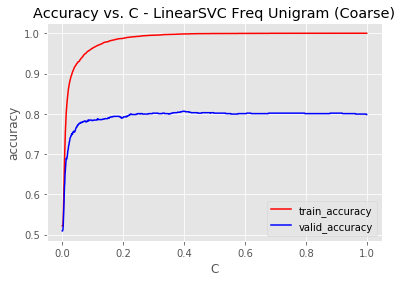

In [38]:
C_list = np.linspace(1e-5, 1, 1000)
num_iterations = len(C_list)
best_score = 0
best_C = 0

valid_scores = []
train_scores = []

for C in C_list:
    clf = svm.LinearSVC(random_state=0, tol=1e-5, C = C, dual = False)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_dev)
    score = metrics.accuracy_score(y_dev, y_pred)
    
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train, clf.predict(X_train)))
    
    if (best_score < score):
        best_score = score
        best_C = C
        

    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1

plt.plot(C_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(C_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('C')
plt.title('Accuracy vs. C - LinearSVC Freq Unigram (Coarse)')
plt.legend(loc='lower right')
plt.savefig('(Treebank)LinearSVC Freq Unigram Coarse')

In [28]:
print('C: ' + str(best_C) + '     ' + 'best_score: ' + str(best_score))
clf = svm.LinearSVC(random_state=0, tol=1e-5, C = best_C, dual = False)
clf.fit(X_final_train, y_final_train)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

C: 0.3563627927927928     best_score: 0.7981651376146789
0.8226249313563976


Score: 0.25363636363636366 Current_Best: 0.25363636363636366 Left: 1000
Score: 0.2909090909090909 Current_Best: 0.2909090909090909 Left: 999
Score: 0.3327272727272727 Current_Best: 0.3327272727272727 Left: 998
Score: 0.34363636363636363 Current_Best: 0.34363636363636363 Left: 997
Score: 0.3481818181818182 Current_Best: 0.3481818181818182 Left: 996
Score: 0.35909090909090907 Current_Best: 0.35909090909090907 Left: 995
Score: 0.35909090909090907 Current_Best: 0.35909090909090907 Left: 994
Score: 0.3563636363636364 Current_Best: 0.35909090909090907 Left: 993
Score: 0.35545454545454547 Current_Best: 0.35909090909090907 Left: 992
Score: 0.35545454545454547 Current_Best: 0.35909090909090907 Left: 991
Score: 0.36 Current_Best: 0.36 Left: 990
Score: 0.36272727272727273 Current_Best: 0.36272727272727273 Left: 989
Score: 0.36454545454545456 Current_Best: 0.36454545454545456 Left: 988
Score: 0.36818181818181817 Current_Best: 0.36818181818181817 Left: 987
Score: 0.3690909090909091 Current_Best: 0.

Score: 0.3836363636363636 Current_Best: 0.4009090909090909 Left: 872
Score: 0.3836363636363636 Current_Best: 0.4009090909090909 Left: 871
Score: 0.38181818181818183 Current_Best: 0.4009090909090909 Left: 870
Score: 0.38181818181818183 Current_Best: 0.4009090909090909 Left: 869
Score: 0.38 Current_Best: 0.4009090909090909 Left: 868
Score: 0.3809090909090909 Current_Best: 0.4009090909090909 Left: 867
Score: 0.3809090909090909 Current_Best: 0.4009090909090909 Left: 866
Score: 0.3809090909090909 Current_Best: 0.4009090909090909 Left: 865
Score: 0.38181818181818183 Current_Best: 0.4009090909090909 Left: 864
Score: 0.38181818181818183 Current_Best: 0.4009090909090909 Left: 863
Score: 0.38181818181818183 Current_Best: 0.4009090909090909 Left: 862
Score: 0.3809090909090909 Current_Best: 0.4009090909090909 Left: 861
Score: 0.38 Current_Best: 0.4009090909090909 Left: 860
Score: 0.38 Current_Best: 0.4009090909090909 Left: 859
Score: 0.3809090909090909 Current_Best: 0.4009090909090909 Left: 858
Sc

Score: 0.38545454545454544 Current_Best: 0.4009090909090909 Left: 751
Score: 0.3845454545454545 Current_Best: 0.4009090909090909 Left: 750
Score: 0.3845454545454545 Current_Best: 0.4009090909090909 Left: 749
Score: 0.38545454545454544 Current_Best: 0.4009090909090909 Left: 748
Score: 0.38545454545454544 Current_Best: 0.4009090909090909 Left: 747
Score: 0.3845454545454545 Current_Best: 0.4009090909090909 Left: 746
Score: 0.3845454545454545 Current_Best: 0.4009090909090909 Left: 745
Score: 0.38545454545454544 Current_Best: 0.4009090909090909 Left: 744
Score: 0.38727272727272727 Current_Best: 0.4009090909090909 Left: 743
Score: 0.38727272727272727 Current_Best: 0.4009090909090909 Left: 742
Score: 0.3881818181818182 Current_Best: 0.4009090909090909 Left: 741
Score: 0.39 Current_Best: 0.4009090909090909 Left: 740
Score: 0.39 Current_Best: 0.4009090909090909 Left: 739
Score: 0.39 Current_Best: 0.4009090909090909 Left: 738
Score: 0.39 Current_Best: 0.4009090909090909 Left: 737
Score: 0.39 Cur

Score: 0.38545454545454544 Current_Best: 0.4009090909090909 Left: 626
Score: 0.38636363636363635 Current_Best: 0.4009090909090909 Left: 625
Score: 0.3845454545454545 Current_Best: 0.4009090909090909 Left: 624
Score: 0.3845454545454545 Current_Best: 0.4009090909090909 Left: 623
Score: 0.3845454545454545 Current_Best: 0.4009090909090909 Left: 622
Score: 0.3845454545454545 Current_Best: 0.4009090909090909 Left: 621
Score: 0.3845454545454545 Current_Best: 0.4009090909090909 Left: 620
Score: 0.38181818181818183 Current_Best: 0.4009090909090909 Left: 619
Score: 0.38181818181818183 Current_Best: 0.4009090909090909 Left: 618
Score: 0.38181818181818183 Current_Best: 0.4009090909090909 Left: 617
Score: 0.38181818181818183 Current_Best: 0.4009090909090909 Left: 616
Score: 0.38181818181818183 Current_Best: 0.4009090909090909 Left: 615
Score: 0.38181818181818183 Current_Best: 0.4009090909090909 Left: 614
Score: 0.3809090909090909 Current_Best: 0.4009090909090909 Left: 613
Score: 0.3809090909090909 

Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 502
Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 501
Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 500
Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 499
Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 498
Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 497
Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 496
Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 495
Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 494
Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 493
Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 492
Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 491
Score: 0.3790909090909091 Current_Best: 0.4009090909090909 Left: 490
Score: 0.3781818181818182 Current_Best: 0.4009090909090909 Left: 489
Score: 0.3781818181818182 Current_

Score: 0.3654545454545455 Current_Best: 0.4009090909090909 Left: 383
Score: 0.3654545454545455 Current_Best: 0.4009090909090909 Left: 382
Score: 0.3654545454545455 Current_Best: 0.4009090909090909 Left: 381
Score: 0.3654545454545455 Current_Best: 0.4009090909090909 Left: 380
Score: 0.3663636363636364 Current_Best: 0.4009090909090909 Left: 379
Score: 0.3663636363636364 Current_Best: 0.4009090909090909 Left: 378
Score: 0.3663636363636364 Current_Best: 0.4009090909090909 Left: 377
Score: 0.3663636363636364 Current_Best: 0.4009090909090909 Left: 376
Score: 0.3663636363636364 Current_Best: 0.4009090909090909 Left: 375
Score: 0.3663636363636364 Current_Best: 0.4009090909090909 Left: 374
Score: 0.3663636363636364 Current_Best: 0.4009090909090909 Left: 373
Score: 0.3663636363636364 Current_Best: 0.4009090909090909 Left: 372
Score: 0.3654545454545455 Current_Best: 0.4009090909090909 Left: 371
Score: 0.3654545454545455 Current_Best: 0.4009090909090909 Left: 370
Score: 0.3654545454545455 Current_

Score: 0.36454545454545456 Current_Best: 0.4009090909090909 Left: 264
Score: 0.36454545454545456 Current_Best: 0.4009090909090909 Left: 263
Score: 0.36454545454545456 Current_Best: 0.4009090909090909 Left: 262
Score: 0.36454545454545456 Current_Best: 0.4009090909090909 Left: 261
Score: 0.36454545454545456 Current_Best: 0.4009090909090909 Left: 260
Score: 0.36454545454545456 Current_Best: 0.4009090909090909 Left: 259
Score: 0.36363636363636365 Current_Best: 0.4009090909090909 Left: 258
Score: 0.36363636363636365 Current_Best: 0.4009090909090909 Left: 257
Score: 0.36363636363636365 Current_Best: 0.4009090909090909 Left: 256
Score: 0.36363636363636365 Current_Best: 0.4009090909090909 Left: 255
Score: 0.36363636363636365 Current_Best: 0.4009090909090909 Left: 254
Score: 0.36363636363636365 Current_Best: 0.4009090909090909 Left: 253
Score: 0.36363636363636365 Current_Best: 0.4009090909090909 Left: 252
Score: 0.36363636363636365 Current_Best: 0.4009090909090909 Left: 251
Score: 0.36363636363

Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 145
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 144
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 143
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 142
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 141
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 140
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 139
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 138
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 137
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 136
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 135
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 134
Score: 0.3609090909090909 Current_Best: 0.4009090909090909 Left: 133
Score: 0.3609090909090909 Current_Best: 0.4009090909090909 Left: 132
Score: 0.3609090909090909 Current_

Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 19
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 18
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 17
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 16
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 15
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 14
Score: 0.3618181818181818 Current_Best: 0.4009090909090909 Left: 13
Score: 0.3609090909090909 Current_Best: 0.4009090909090909 Left: 12
Score: 0.3609090909090909 Current_Best: 0.4009090909090909 Left: 11
Score: 0.3609090909090909 Current_Best: 0.4009090909090909 Left: 10
Score: 0.3609090909090909 Current_Best: 0.4009090909090909 Left: 9
Score: 0.3609090909090909 Current_Best: 0.4009090909090909 Left: 8
Score: 0.3609090909090909 Current_Best: 0.4009090909090909 Left: 7
Score: 0.3609090909090909 Current_Best: 0.4009090909090909 Left: 6
Score: 0.3609090909090909 Current_Best: 0.4009090909

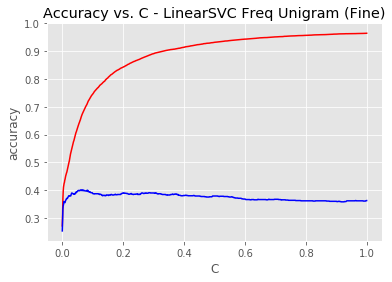

In [29]:
C_list = np.linspace(1e-5, 1, 1000)
num_iterations = len(C_list)
best_score = 0
best_C = 0

valid_scores = []
train_scores = []

for C in C_list:
    clf = svm.LinearSVC(random_state=0, tol=1e-5, C = C)
    clf.fit(X_train_2, y_train_2)
    y_pred = clf.predict(X_dev_2)
    score = metrics.accuracy_score(y_dev_2, y_pred)
    
    if (best_score < score):
        best_score = score
        best_C = C
        
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train_2, clf.predict(X_train_2)))
    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1
    
clf = svm.LinearSVC(random_state=0, tol=1e-5, C = best_C)
clf.fit(X_final_train_2, y_final_train_2)
y_pred = clf.predict(X_test_2)

plt.plot(C_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(C_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('C')
plt.title('Accuracy vs. C - LinearSVC Freq Unigram (Fine)')
plt.savefig('(Treebank)LinearSVC Freq Unigram Fine')

score = metrics.accuracy_score(y_test_2, y_pred)
print(score)
print(best_C)

In [39]:
X_train, y_train = load_file('sst_train_sentences.csv')
X_dev, y_dev = load_file('sst_dev.csv')
X_test, y_test = load_file('sst_test.csv')
y_final_train = np.array(y_train + y_dev)
X_final_train = np.array([row for row in X_train] + [row for row in X_dev])

X_train_2, y_train_2 = load_file2('sst_train_sentences.csv')
X_dev_2, y_dev_2 = load_file2('sst_dev.csv')
X_test_2, y_test_2 = load_file2('sst_test.csv')
y_final_train_2 = np.array(y_train_2 + y_dev_2)
X_final_train_2 = np.array([row for row in X_train_2] + [row for row in X_dev_2])

vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range = (1,2), binary = False, sublinear_tf = True)
#vectorizer = feature_extraction.text.CountVectorizer(ngram_range = (1,2), binary = False)
vectorizer.fit(X_train + X_dev + X_test)
X_train = vectorizer.transform(X_train)
X_dev = vectorizer.transform(X_dev)
X_test = vectorizer.transform(X_test)
X_final_train = vectorizer.transform(X_final_train)

vectorizer_2 = feature_extraction.text.TfidfVectorizer(ngram_range = (1,2), binary = False, sublinear_tf = True)
#vectorizer_2 = feature_extraction.text.CountVectorizer(ngram_range = (1,2), binary = False)
vectorizer_2.fit(X_train_2 + X_dev_2 + X_test_2)
X_train_2 = vectorizer_2.transform(X_train_2)
X_dev_2 = vectorizer_2.transform(X_dev_2)
X_test_2 = vectorizer_2.transform(X_test_2)
X_final_train_2 = vectorizer_2.transform(X_final_train_2)

Score: 0.5091743119266054 Current_Best: 0.5091743119266054 Left: 1000
Score: 0.5091743119266054 Current_Best: 0.5091743119266054 Left: 999
Score: 0.5126146788990825 Current_Best: 0.5126146788990825 Left: 998
Score: 0.5217889908256881 Current_Best: 0.5217889908256881 Left: 997
Score: 0.5435779816513762 Current_Best: 0.5435779816513762 Left: 996
Score: 0.5676605504587156 Current_Best: 0.5676605504587156 Left: 995
Score: 0.588302752293578 Current_Best: 0.588302752293578 Left: 994
Score: 0.6169724770642202 Current_Best: 0.6169724770642202 Left: 993
Score: 0.6272935779816514 Current_Best: 0.6272935779816514 Left: 992
Score: 0.6490825688073395 Current_Best: 0.6490825688073395 Left: 991
Score: 0.6605504587155964 Current_Best: 0.6605504587155964 Left: 990
Score: 0.6743119266055045 Current_Best: 0.6743119266055045 Left: 989
Score: 0.6811926605504587 Current_Best: 0.6811926605504587 Left: 988
Score: 0.6892201834862385 Current_Best: 0.6892201834862385 Left: 987
Score: 0.6869266055045872 Current_B

Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 875
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 874
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 873
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 872
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 871
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 870
Score: 0.7855504587155964 Current_Best: 0.7878440366972477 Left: 869
Score: 0.786697247706422 Current_Best: 0.7878440366972477 Left: 868
Score: 0.786697247706422 Current_Best: 0.7878440366972477 Left: 867
Score: 0.786697247706422 Current_Best: 0.7878440366972477 Left: 866
Score: 0.786697247706422 Current_Best: 0.7878440366972477 Left: 865
Score: 0.786697247706422 Current_Best: 0.7878440366972477 Left: 864
Score: 0.786697247706422 Current_Best: 0.7878440366972477 Left: 863
Score: 0.7878440366972477 Current_Best: 0.7878440366972477 Left: 862
Score: 0.7878440366972477 Current_Best: 

Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 750
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 749
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 748
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 747
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 746
Score: 0.7993119266055045 Current_Best: 0.8004587155963303 Left: 745
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 744
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 743
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 742
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 741
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 740
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 739
Score: 0.8004587155963303 Current_Best: 0.8004587155963303 Left: 738
Score: 0.7993119266055045 Current_Best: 0.8004587155963303 Left: 737
Score: 0.7993119266055045 Current_

Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 625
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 624
Score: 0.8027522935779816 Current_Best: 0.8027522935779816 Left: 623
Score: 0.8038990825688074 Current_Best: 0.8038990825688074 Left: 622
Score: 0.8038990825688074 Current_Best: 0.8038990825688074 Left: 621
Score: 0.8038990825688074 Current_Best: 0.8038990825688074 Left: 620
Score: 0.8038990825688074 Current_Best: 0.8038990825688074 Left: 619
Score: 0.8038990825688074 Current_Best: 0.8038990825688074 Left: 618
Score: 0.8038990825688074 Current_Best: 0.8038990825688074 Left: 617
Score: 0.8038990825688074 Current_Best: 0.8038990825688074 Left: 616
Score: 0.8038990825688074 Current_Best: 0.8038990825688074 Left: 615
Score: 0.8038990825688074 Current_Best: 0.8038990825688074 Left: 614
Score: 0.8038990825688074 Current_Best: 0.8038990825688074 Left: 613
Score: 0.805045871559633 Current_Best: 0.805045871559633 Left: 612
Score: 0.805045871559633 Current_Bes

Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 504
Score: 0.8027522935779816 Current_Best: 0.8061926605504587 Left: 503
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 502
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 501
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 500
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 499
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 498
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 497
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 496
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 495
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 494
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 493
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 492
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 491
Score: 0.801605504587156 Current_Best: 0.80619

Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 382
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 381
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 380
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 379
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 378
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 377
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 376
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 375
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 374
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 373
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 372
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 371
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 370
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 369
Score: 0.8004587155963303 Current_Be

Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 259
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 258
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 257
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 256
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 255
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 254
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 253
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 252
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 251
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 250
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 249
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 248
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 247
Score: 0.801605504587156 Current_Best: 0.8061926605504587 Left: 246
Score: 0.801605504587156 Current_Best: 0.8061926

Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 139
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 138
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 137
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 136
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 135
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 134
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 133
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 132
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 131
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 130
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 129
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 128
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 127
Score: 0.8004587155963303 Current_Best: 0.8061926605504587 Left: 126
Score: 0.8004587155963303 Current_

Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 17
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 16
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 15
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 14
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 13
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 12
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 11
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 10
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 9
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 8
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 7
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 6
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 5
Score: 0.7993119266055045 Current_Best: 0.8061926605504587 Left: 4
Score: 0.7993119266055045 Current_Best: 0.806192660550

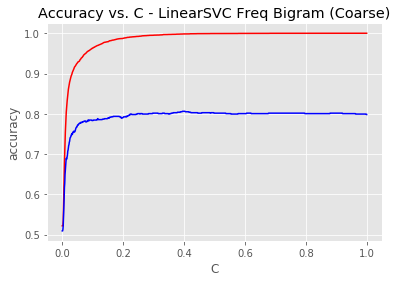

In [32]:
C_list = np.linspace(1e-5, 1, 1000)
num_iterations = len(C_list)
best_score = 0
best_C = 0

valid_scores = []
train_scores = []

for C in C_list:
    clf = svm.LinearSVC(random_state=0, tol=1e-5, C = C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_dev)
    score = metrics.accuracy_score(y_dev, y_pred)
    
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train, clf.predict(X_train)))
    
    if (best_score < score):
        best_score = score
        best_C = C
        
    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1
    
plt.plot(C_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(C_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('C')
plt.title('Accuracy vs. C - LinearSVC Freq Bigram (Coarse)')
plt.savefig('(Treebank)LinearSVC Freq Bigram Coarse')

In [33]:
print('C: ' + str(best_C) + '     ' + 'best_score: ' + str(best_score))
clf = svm.LinearSVC(random_state=0, tol=1e-5, C = best_C)
clf.fit(X_final_train, y_final_train)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

C: 0.3944004504504505     best_score: 0.8061926605504587
0.8171334431630972


Score: 0.25727272727272726 Current_Best: 0.25727272727272726 Left: 1000
Score: 0.2781818181818182 Current_Best: 0.2781818181818182 Left: 999
Score: 0.3018181818181818 Current_Best: 0.3018181818181818 Left: 998
Score: 0.31636363636363635 Current_Best: 0.31636363636363635 Left: 997
Score: 0.3290909090909091 Current_Best: 0.3290909090909091 Left: 996
Score: 0.34 Current_Best: 0.34 Left: 995
Score: 0.3390909090909091 Current_Best: 0.34 Left: 994
Score: 0.3427272727272727 Current_Best: 0.3427272727272727 Left: 993
Score: 0.34454545454545454 Current_Best: 0.34454545454545454 Left: 992
Score: 0.3490909090909091 Current_Best: 0.3490909090909091 Left: 991
Score: 0.3509090909090909 Current_Best: 0.3509090909090909 Left: 990
Score: 0.3509090909090909 Current_Best: 0.3509090909090909 Left: 989
Score: 0.3563636363636364 Current_Best: 0.3563636363636364 Left: 988
Score: 0.3563636363636364 Current_Best: 0.3563636363636364 Left: 987
Score: 0.3572727272727273 Current_Best: 0.3572727272727273 Left: 986


Score: 0.3936363636363636 Current_Best: 0.39454545454545453 Left: 880
Score: 0.39454545454545453 Current_Best: 0.39454545454545453 Left: 879
Score: 0.39454545454545453 Current_Best: 0.39454545454545453 Left: 878
Score: 0.3936363636363636 Current_Best: 0.39454545454545453 Left: 877
Score: 0.39454545454545453 Current_Best: 0.39454545454545453 Left: 876
Score: 0.39454545454545453 Current_Best: 0.39454545454545453 Left: 875
Score: 0.39454545454545453 Current_Best: 0.39454545454545453 Left: 874
Score: 0.3936363636363636 Current_Best: 0.39454545454545453 Left: 873
Score: 0.3936363636363636 Current_Best: 0.39454545454545453 Left: 872
Score: 0.3936363636363636 Current_Best: 0.39454545454545453 Left: 871
Score: 0.3936363636363636 Current_Best: 0.39454545454545453 Left: 870
Score: 0.3936363636363636 Current_Best: 0.39454545454545453 Left: 869
Score: 0.39454545454545453 Current_Best: 0.39454545454545453 Left: 868
Score: 0.3936363636363636 Current_Best: 0.39454545454545453 Left: 867
Score: 0.39454

Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 757
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 756
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 755
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 754
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 753
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 752
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 751
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 750
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 749
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 748
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 747
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 746
Score: 0.39545454545454545 Current_Best: 0.4009090909090909 Left: 745
Score: 0.39545454545454545 Current_Best: 0.4009090909090909 Left: 744
Score: 0.396363636363

Score: 0.39545454545454545 Current_Best: 0.4009090909090909 Left: 639
Score: 0.39545454545454545 Current_Best: 0.4009090909090909 Left: 638
Score: 0.39545454545454545 Current_Best: 0.4009090909090909 Left: 637
Score: 0.39545454545454545 Current_Best: 0.4009090909090909 Left: 636
Score: 0.39636363636363636 Current_Best: 0.4009090909090909 Left: 635
Score: 0.39636363636363636 Current_Best: 0.4009090909090909 Left: 634
Score: 0.39636363636363636 Current_Best: 0.4009090909090909 Left: 633
Score: 0.39545454545454545 Current_Best: 0.4009090909090909 Left: 632
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 631
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 630
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 629
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 628
Score: 0.39636363636363636 Current_Best: 0.4009090909090909 Left: 627
Score: 0.39636363636363636 Current_Best: 0.4009090909090909 Left: 626
Score: 0.39636363636

Score: 0.39545454545454545 Current_Best: 0.4009090909090909 Left: 521
Score: 0.39545454545454545 Current_Best: 0.4009090909090909 Left: 520
Score: 0.39545454545454545 Current_Best: 0.4009090909090909 Left: 519
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 518
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 517
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 516
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 515
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 514
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 513
Score: 0.39454545454545453 Current_Best: 0.4009090909090909 Left: 512
Score: 0.39545454545454545 Current_Best: 0.4009090909090909 Left: 511
Score: 0.39545454545454545 Current_Best: 0.4009090909090909 Left: 510
Score: 0.39636363636363636 Current_Best: 0.4009090909090909 Left: 509
Score: 0.39636363636363636 Current_Best: 0.4009090909090909 Left: 508
Score: 0.39636363636

Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 403
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 402
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 401
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 400
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 399
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 398
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 397
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 396
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 395
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 394
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 393
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 392
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 391
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 390
Score: 0.3972727272727273 Current_

Score: 0.3981818181818182 Current_Best: 0.4009090909090909 Left: 282
Score: 0.3990909090909091 Current_Best: 0.4009090909090909 Left: 281
Score: 0.3990909090909091 Current_Best: 0.4009090909090909 Left: 280
Score: 0.3990909090909091 Current_Best: 0.4009090909090909 Left: 279
Score: 0.3990909090909091 Current_Best: 0.4009090909090909 Left: 278
Score: 0.3990909090909091 Current_Best: 0.4009090909090909 Left: 277
Score: 0.3990909090909091 Current_Best: 0.4009090909090909 Left: 276
Score: 0.3990909090909091 Current_Best: 0.4009090909090909 Left: 275
Score: 0.3990909090909091 Current_Best: 0.4009090909090909 Left: 274
Score: 0.3990909090909091 Current_Best: 0.4009090909090909 Left: 273
Score: 0.3990909090909091 Current_Best: 0.4009090909090909 Left: 272
Score: 0.3981818181818182 Current_Best: 0.4009090909090909 Left: 271
Score: 0.3981818181818182 Current_Best: 0.4009090909090909 Left: 270
Score: 0.3972727272727273 Current_Best: 0.4009090909090909 Left: 269
Score: 0.3972727272727273 Current_

Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 164
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 163
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 162
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 161
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 160
Score: 0.3927272727272727 Current_Best: 0.4009090909090909 Left: 159
Score: 0.3927272727272727 Current_Best: 0.4009090909090909 Left: 158
Score: 0.3927272727272727 Current_Best: 0.4009090909090909 Left: 157
Score: 0.3927272727272727 Current_Best: 0.4009090909090909 Left: 156
Score: 0.3927272727272727 Current_Best: 0.4009090909090909 Left: 155
Score: 0.3927272727272727 Current_Best: 0.4009090909090909 Left: 154
Score: 0.3927272727272727 Current_Best: 0.4009090909090909 Left: 153
Score: 0.3927272727272727 Current_Best: 0.4009090909090909 Left: 152
Score: 0.3927272727272727 Current_Best: 0.4009090909090909 Left: 151
Score: 0.3927272727272727 Current_

Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 45
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 44
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 43
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 42
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 41
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 40
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 39
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 38
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 37
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 36
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 35
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 34
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 33
Score: 0.3936363636363636 Current_Best: 0.4009090909090909 Left: 32
Score: 0.3936363636363636 Current_Best: 0.400909

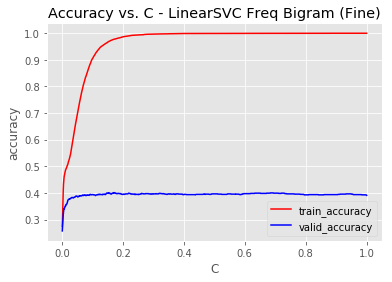

In [40]:
C_list = np.linspace(1e-3, 1, 1000)
num_iterations = len(C_list)
best_score = 0
best_C = 0

valid_scores = []
train_scores = []

for C in C_list:
    clf = svm.LinearSVC(random_state=0, tol=1e-5, C = C)
    clf.fit(X_train_2, y_train_2)
    y_pred = clf.predict(X_dev_2)
    score = metrics.accuracy_score(y_dev_2, y_pred)
    
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train_2, clf.predict(X_train_2)))
    
    if (best_score < score):
        best_score = score
        best_C = C
        
    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1
    
plt.plot(C_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(C_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('C')
plt.title('Accuracy vs. C - LinearSVC Freq Bigram (Fine)')
plt.legend(loc='lower right')
plt.savefig('(Treebank)LinearSVC Freq Bigram Fine')

clf = svm.LinearSVC(random_state=0, tol=1e-5, C = best_C)
clf.fit(X_final_train_2, y_final_train_2)
y_pred = clf.predict(X_test_2)

score = metrics.accuracy_score(y_test_2, y_pred)
print(score)
print(best_C)